**Exercici 1**  

Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Lectura del dataframe
viviendas = pd.read_csv('housing data.csv', header = None)
# Establim les columnes (informació al arxiu adjunt)
viviendas.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

viviendas.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


El fitxer .txt proporciona la informació amb el nom de les columnes així com el seu significat:  

- **CRIM** Tasa de criminalidad per cápita por ciudad
- **ZN** Proporción de suelo residencial zonificado para lotes de más de 25.000 pies cuadrados
- **INDUS** Proporción  de acres comerciales no minoristas por ciudad
- **CHAS** Variable ficticia Charles River (Si limita con el rio = 1, 0 de lo contrario)
- **NOX** Concentración de óxidos nítricos  (partes por 10 millones)
- **RM** Promedio de cuartos por vivienda
- **AGE** Proporción de unidades ocupadas por sus propietarios construidas antes de 1940
- **DIS** Distancias ponderadas  a cinco centros de empleo de Boston
- **RAD** Índice  de accesibilidad a vías radiales
- **TAX** Tasa de impuesto sobre valor total de la propiedad (por cada $10,000)
- **PTRATIO** Ratio alumno-profesor por municipio
- **B** Proporción de Población Afroamericana por ciudad.
- **LSTAT** Proporción población en situación socioeconomica vulnerable
- **MEDV** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares

Tenint en compte l'exercici anterior (M5_T02), podem establir que no hi ha valors NaN, duplicats ni nuls i disposem d'informació del dataframe:  

- Les variables CHAD i RAD són categòriques (CHAS binària i RAD és un índex)
- Algunes variables tenen outliers: CRIM', 'ZN', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT' i 'MEDV'.
- Las variables no son Normalmente distribuidas.

Dado que las variables numéricas no son Gaussianas, aplicaremos **Robust Scaler** para las que contienen valores atípicos y **MinMax Scaling** para las variables sin valores atípicos.  
En cuanto al las variables categóricas (RAD), aplicaremos la Codificación **One-Hot**.

In [3]:
viviendas = pd.get_dummies(data = viviendas, columns = ['RAD'])
viviendas.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,MEDV,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296.0,15.3,...,24.0,1,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242.0,17.8,...,21.6,0,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242.0,17.8,...,34.7,0,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222.0,18.7,...,33.4,0,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222.0,18.7,...,36.2,0,0,1,0,0,0,0,0,0


In [4]:
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler

# Copia de la BD para tener las transformaciones:
viviendas_transf = viviendas.copy()

col_RS = ['CRIM','ZN','RM','DIS','PTRATIO', 'B','LSTAT']

scaler = preprocessing.RobustScaler().fit(viviendas_transf[col_RS])
viviendas_transf[col_RS] = scaler.transform(viviendas_transf[col_RS])
viviendas_transf.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,MEDV,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
0,-0.069593,1.44,2.31,0,0.538,0.496612,65.2,0.285777,296.0,-1.339286,...,24.0,1,0,0,0,0,0,0,0,0
1,-0.063755,0.00,7.07,0,0.469,0.287940,78.9,0.569789,242.0,-0.446429,...,21.6,0,1,0,0,0,0,0,0,0
2,-0.063760,0.00,7.07,0,0.469,1.323171,61.1,0.569789,242.0,-0.446429,...,34.7,0,1,0,0,0,0,0,0,0
3,-0.062347,0.00,2.18,0,0.458,1.069783,45.8,0.924391,222.0,-0.125000,...,33.4,0,0,1,0,0,0,0,0,0
4,-0.052144,0.00,2.18,0,0.458,1.271680,54.2,0.924391,222.0,-0.125000,...,36.2,0,0,1,0,0,0,0,0,0


In [5]:
from sklearn.preprocessing import MinMaxScaler

col_MMS = ['INDUS', 'NOX', 'AGE', 'TAX', 'PTRATIO']

scaler2 = preprocessing.MinMaxScaler().fit(viviendas_transf[col_MMS])
viviendas_transf[col_MMS] = scaler2.transform(viviendas_transf[col_MMS])
viviendas_transf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,MEDV,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
0,-0.069593,1.44,0.067815,0,0.314815,0.496612,0.641607,0.285777,0.208015,0.287234,...,24.0,1,0,0,0,0,0,0,0,0
1,-0.063755,0.00,0.242302,0,0.172840,0.287940,0.782698,0.569789,0.104962,0.553191,...,21.6,0,1,0,0,0,0,0,0,0
2,-0.063760,0.00,0.242302,0,0.172840,1.323171,0.599382,0.569789,0.104962,0.553191,...,34.7,0,1,0,0,0,0,0,0,0
3,-0.062347,0.00,0.063050,0,0.150206,1.069783,0.441813,0.924391,0.066794,0.648936,...,33.4,0,0,1,0,0,0,0,0,0
4,-0.052144,0.00,0.063050,0,0.150206,1.271680,0.528321,0.924391,0.066794,0.648936,...,36.2,0,0,1,0,0,0,0,0,0


In [6]:
pd.options.display.max_columns= 25
viviendas_transf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
0,-0.069593,1.44,0.067815,0,0.314815,0.496612,0.641607,0.285777,0.208015,0.287234,0.261902,-0.637681,24.0,1,0,0,0,0,0,0,0,0
1,-0.063755,0.00,0.242302,0,0.172840,0.287940,0.782698,0.569789,0.104962,0.553191,0.261902,-0.221889,21.6,0,1,0,0,0,0,0,0,0
2,-0.063760,0.00,0.242302,0,0.172840,1.323171,0.599382,0.569789,0.104962,0.553191,0.066675,-0.732634,34.7,0,1,0,0,0,0,0,0,0
3,-0.062347,0.00,0.063050,0,0.150206,1.069783,0.441813,0.924391,0.066794,0.648936,0.153016,-0.841579,33.4,0,0,1,0,0,0,0,0,0
4,-0.052144,0.00,0.063050,0,0.150206,1.271680,0.528321,0.924391,0.066794,0.648936,0.261902,-0.602699,36.2,0,0,1,0,0,0,0,0,0


In [7]:
# Separo la variable target (MEDV) para el eje y el resto para el X

X = viviendas_transf.drop(['MEDV'],axis=1)
y = viviendas_transf['MEDV']

In [8]:
# Los dos conjuntos anteriores se separan en train y test. (Train para ajustar modelo y test para aplicarlo).
from sklearn.model_selection import train_test_split

# 80% para train / 20% para test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

In [9]:
# Comprobamos que ambos test / train tienen el mismo tamaño:

print(len(X_train) == len(y_train))
print(len(X_test) == len(y_test))

True
True


En primer lugar miramos si existe multicolinealidad. Cuando existe una correlación demasiado alta entre las variable, puede afectar al resultado de los análisis.  
Las variables pueden ser redundantes.

In [10]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ajustamos un modelo lineal a los datos.
# OLS es método para ajustar un modelo lineal mediante la minimización de la suma de los cuadrados de los residuos.

modelo = sm.OLS(X,y)

# calculo del Factor de inflación de la varianza

VIF_columnas = []
for i in range(X.shape[1]):
    VIF_columnas.append(variance_inflation_factor(X, i))
    
print(VIF_columnas)

# X.shape[0] devuelve el número de filas de la matriz y X.shape[1] devuelve el número de columnas


[1.81186747861482, 2.4961842211294605, 4.3704710743014585, 1.1018427797894328, 4.6729064695329745, 2.0075931394301687, 3.177556368310554, 4.143582866154159, 9.876852501300885, 2.2426831723843783, 1.3525155027083597, 2.997620158154093, 2.8147469561478062, 2.848488413102465, 3.669184329443229, 11.210411484630638, 9.551398988262163, 2.9182863307699956, 2.541976791414778, 3.0548293051765048, 28.63938524110811]


Podemos apreciar que existen algunas columnas con un alto grado de multicolinealidad, lo que podría afectar negativamente a los análisis estadísticos.  
(Se ha de tener en cuenta para los resultados de las predicciones)

Apliquem diferents models de regressió:  

**Linear regression:**

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


# Aplicamos Regresión Lineal
modelo_RL = LinearRegression()

#Entrenamiento y predicción
modelo_RL.fit(X_train, y_train)
prediccion_RL_y = modelo_RL.predict(X_test)

print('Precisión del train: ', modelo_RL.score(X_train, y_train))
print('Precisión del test: ',  modelo_RL.score(X_test, y_test))
# print('Precisión de modelo: ', r2_score(y, modelo_RL.predict(X)))

Precisión del train:  0.7482850019433813
Precisión del test:  0.738409918092009


La precisión es menor en el Test que en el Train

In [12]:
# Coeficiente de determinación R2 y el error cuadrático medio (MSE) entre las predicciones y los valores reales.

r2_RL = r2_score(y_test, prediccion_RL_y)
mse_RL = mean_squared_error(y_test, prediccion_RL_y)
print('Coeficiente de determinación R2: ', r2_RL)
print('Error cuadrático medio: ', mse_RL)

Coeficiente de determinación R2:  0.738409918092009
Error cuadrático medio:  18.136612889846443


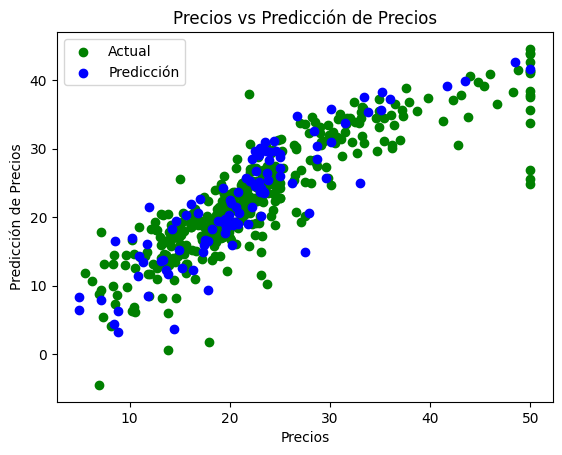

In [13]:
# scatter de train (verde)
plt.scatter(y_train, modelo_RL.predict(X_train), c = 'green', label='Actual')
plt.scatter(y_test,prediccion_RL_y, c='blue', label='Predicción')


plt.xlabel("Precios")
plt.ylabel("Predicción de Precios")
plt.title("Precios vs Predicción de Precios")
plt.legend()
plt.show()

**Support Vector Machines (SVM)**

In [14]:
from sklearn.svm import SVR
modelo_SVM = SVR()

modelo_SVM.fit(X_train, y_train)
prediccion_SVM_y = modelo_SVM.predict(X_test)

print('Precisión del train: ', modelo_SVM.score(X_train, y_train))
print("Precisión del test: ", modelo_SVM.score(X_test, y_test))
# print("Precisión del modelo: ", r2_score(y, modelo_SVM.predict(X)))

Precisión del train:  0.5964711404869724
Precisión del test:  0.6688063250800098


In [15]:
r2_SVM = r2_score(y_test, prediccion_SVM_y)
mse_SVM = mean_squared_error(y_test, prediccion_SVM_y)
print('Coeficiente de determinación R2: ', r2_SVM)
print('Error cuadrático medio: ', mse_SVM)

Coeficiente de determinación R2:  0.6688063250800098
Error cuadrático medio:  22.962382326491458


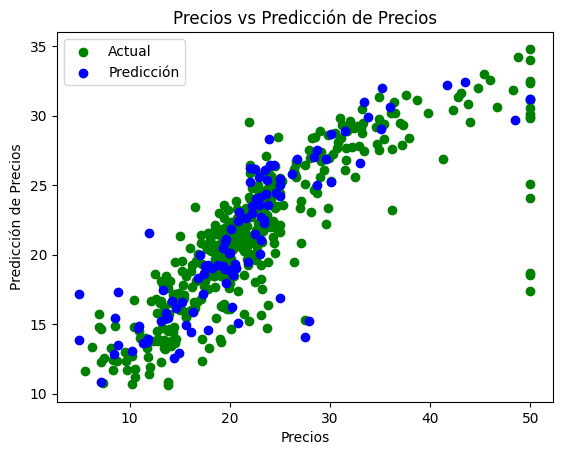

In [16]:
plt.scatter(y_train, modelo_SVM.predict(X_train), c = 'green', label='Actual')
plt.scatter(y_test, prediccion_SVM_y, c='blue', label='Predicción')

plt.xlabel("Precios")
plt.ylabel("Predicción de Precios")
plt.title("Precios vs Predicción de Precios")
plt.legend()
plt.show()

**K - Neighbors**

In [17]:
from sklearn.neighbors import KNeighborsRegressor
modelo_KNN = KNeighborsRegressor()

modelo_KNN.fit(X_train, y_train)
prediccion_KNN_y = modelo_KNN.predict(X_test)

print('Precisión del train: ', modelo_KNN.score(X_train, y_train))
print("Precisión del test: ", modelo_KNN.score(X_test, y_test))
# print("Precisión del modelo: ", r2_score(y, modelo_KNN.predict(X)))

Precisión del train:  0.8287387699781297
Precisión del test:  0.8293783480504798


In [18]:
r2_KNN = r2_score(y_test, prediccion_KNN_y)
mse_KNN = mean_squared_error(y_test, prediccion_KNN_y)
print('Coeficiente de determinación R2: ', r2_KNN)
print('Error cuadrático medio: ', mse_KNN)

Coeficiente de determinación R2:  0.8293783480504798
Error cuadrático medio:  11.829572549019602


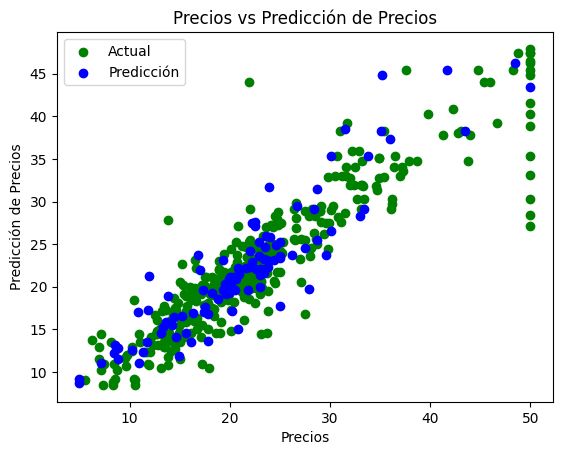

In [19]:
plt.scatter(y_train, modelo_KNN.predict(X_train), c='green', label='Actual')
plt.scatter(y_test, prediccion_KNN_y, c='blue', label='Predicción')
plt.xlabel("Precios")
plt.ylabel("Predicción de Precios")
plt.title("Precios vs Predicción de Precios")
plt.legend()
plt.show()

**Exercici 2**  

Compara’ls en base al MSE i al R2.

In [20]:
tabla = pd.DataFrame(data = [['Regresión Lineal', r2_RL, mse_RL], ['Support Vector Machines', r2_SVM, mse_SVM], ['K-Neighbors', r2_KNN, mse_KNN]])

In [21]:
tabla.columns = ['Modelo', 'R2', 'MSE']
tabla

,Modelo,R2,MSE
0,Regresión Lineal,0.738410,18.136613
1,Support Vector Machines,0.668806,22.962382
2,K-Neighbors,0.829378,11.829573


El **Error Cuadrático Medio (MSE)** es una medida para evaluar el rendimiento de un modelo de regresión.  
Mide la diferencia promedio al cuadrado entre los valores predichos por el modelo y los valores reales.  
  
Implica tomar la diferencia entre cada valor predicho y su valor real correspondiente, elevar esa diferencia al cuadrado y luego calcular el promedio de todas las diferencias al cuadrado.  
El MSE es una métrica no negativa, ya que involucra elevar al cuadrado las diferencias.  
  
El MSE penaliza de manera más fuerte los errores más grandes debido al término de elevar al cuadrado. Esto significa que los errores más grandes tienen un impacto proporcionalmente mayor en el valor del MSE.

Cuanto más cercano a cero sea el valor del MSE, mejor será el ajuste del modelo a los datos y menor será la discrepancia entre las predicciones y los valores reales, por lo que en lo que respecta a los modelos utilizados, el  modelo de **Regresión Lineal** es el que ha funcionado mejor.

El **coeficiente de determinación R2** (también conocido como **R-cuadrado**) es una métrica utilizada para evaluar la calidad de un modelo de regresión. Cómo de bien se ajustan las predicciones del modelo a los datos observados.  
  
El coeficiente R2 varía entre 0 y 1:   
- R2 = 0: El modelo no explica la variabilidad de los datos y sus predicciones no son mejores que simplemente usar el valor medio de la variable de respuesta.  
- R2 = 1: El modelo ajusta perfectamente los datos y puede explicar toda la variabilidad observada.  
- R2 negativo: puede indicar que el modelo es inapropiado o que las predicciones son peores que simplemente usar el valor medio de la variable de respuesta.  

R2 no indica la calidad absoluta del modelo y no proporciona información sobre la precisión de las predicciones individuales. Hay que complementar el R2 con otras métricas de evaluación, como el MSE o el MAE (Error Absoluto Medio)  
En los modelos utilizados, el mejor valor de R2 es el del modelo de **Regresión Lineal** también, pero dado que el valor oscila entre 0 y 1 , es algo mayor de la mitad, lo que no parece indicar una gran calidad del modelo.

**Exercici 3**  

Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.

Importamos **GridSearchCV**, para encontrar los valores de los Hiperparámetros que funcionen mejor en un *Grid* (conjunto de los valores ajustables de los hiperparámetros del modelo)  
Después se vuelve a hacer la predicción con los hiperparámetros optimizados para ver si mejora el modelo.

In [22]:
from sklearn.model_selection import GridSearchCV

**Miramos los parametros del modelo de Regresion Lineal:**

In [23]:
modelo_RL.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [24]:
parametros_RL = {
    'copy_X': [True, False],
    'fit_intercept': [True, False],
    'positive': [True, False]
}

In [25]:
grid = GridSearchCV(LinearRegression(), parametros_RL, cv=10)
grid.fit(X, y)
print(grid.best_params_)

{'copy_X': True, 'fit_intercept': False, 'positive': False}


Se repite el modelo, indicando los nuevos parámetros:

In [26]:
modelo_RL_2 = LinearRegression(copy_X= True, fit_intercept= False, positive= False)

#Entrenamiento y predicción
modelo_RL_2.fit(X_train, y_train)
prediccion_RL_y_2 = modelo_RL_2.predict(X_test)

print('Precisión del train_2: ', modelo_RL_2.score(X_train, y_train))
print('Precisión del test_2: ',  modelo_RL_2.score(X_test, y_test))
# print('Precisión de modelo_2: ', r2_score(y, modelo_RL_2.predict(X)))

Precisión del train_2:  0.7482850019433814
Precisión del test_2:  0.738409918092005


In [27]:
r2_RL_2 = r2_score(y_test, prediccion_RL_y_2)
mse_RL_2 = mean_squared_error(y_test, prediccion_RL_y_2)
print('Coeficiente de determinación R2: ', r2_RL_2)
print('Error cuadrático medio: ', mse_RL_2)

Coeficiente de determinación R2:  0.738409918092005
Error cuadrático medio:  18.13661288984672


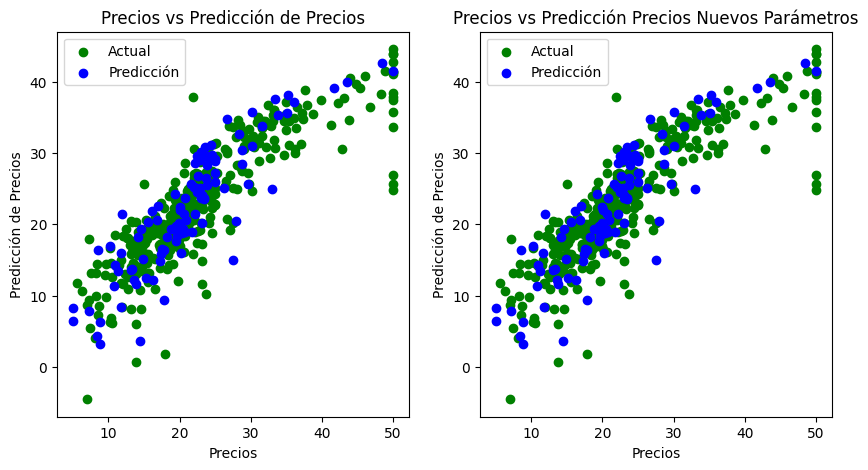

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
# Izquierda
ax1.scatter(y_train, modelo_RL.predict(X_train), c = 'green', label='Actual')
ax1.scatter(y_test,prediccion_RL_y, c='blue', label='Predicción')

ax1.set_xlabel("Precios")
ax1.set_ylabel("Predicción de Precios")
ax1.set_title("Precios vs Predicción de Precios")
ax1.legend()

# Derecha
ax2.scatter(y_train, modelo_RL_2.predict(X_train), c = 'green', label='Actual')
ax2.scatter(y_test,prediccion_RL_y_2, c='blue', label='Predicción')

ax2.set_xlabel("Precios")
ax2.set_ylabel("Predicción de Precios")
ax2.set_title("Precios vs Predicción Precios Nuevos Parámetros")
ax2.legend()

plt.show()

No parece haber mejorado el modelo con los nuevos parámetros

In [29]:
valores_RL = pd.DataFrame(data = [['Coeficiente de determinación R2: ', r2_RL, r2_RL_2], ['Error cuadrático medio: ', mse_RL, mse_RL_2]])

In [30]:
valores_RL.columns = ['Modelo', 'RL', 'RL_Mejorado']
valores_RL

# ¿NO ha cambiado nada? ¿?

,Modelo,RL,RL_Mejorado
0,Coeficiente de determinación R2:,0.738410,0.738410
1,Error cuadrático medio:,18.136613,18.136613


**Miramos los parametros del modelo SVM:**

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
modelo_SVM.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [33]:
modelo_SVM.get_params().keys()

dict_keys(['C', 'cache_size', 'coef0', 'degree', 'epsilon', 'gamma', 'kernel', 'max_iter', 'shrinking', 'tol', 'verbose'])

In [34]:
parametros_SVM = {
    'C': [1, 5, 8, 10,12],
    'gamma': ['scale','auto'],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4]
}

In [35]:
grid = GridSearchCV(SVR(), parametros_SVM, cv=10)
grid.fit(X, y)
print(grid.best_params_)

{'C': 12, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}


Se repite el modelo, indicando los nuevos parámetros:

In [36]:

modelo_SVM_2 = SVR(C = 12, degree= 2, gamma = 'auto', kernel = 'rbf')

modelo_SVM_2.fit(X_train, y_train)
prediccion_SVM_y_2= modelo_SVM_2.predict(X_test)

print('Precisión del train: ', modelo_SVM_2.score(X_train, y_train))
print("Precisión del test: ", modelo_SVM_2.score(X_test, y_test))
# print("Precisión del modelo: ", r2_score(y, modelo_SVM_2.predict(X)))

Precisión del train:  0.8460904129552783
Precisión del test:  0.8415405761496809


In [37]:
r2_SVM_2 = r2_score(y_test, prediccion_SVM_y_2)
mse_SVM_2 = mean_squared_error(y_test, prediccion_SVM_y_2)
print('Coeficiente de determinación R2: ', r2_SVM_2)
print('Error cuadrático medio: ', mse_SVM_2)

Coeficiente de determinación R2:  0.8415405761496809
Error cuadrático medio:  10.986338656876828


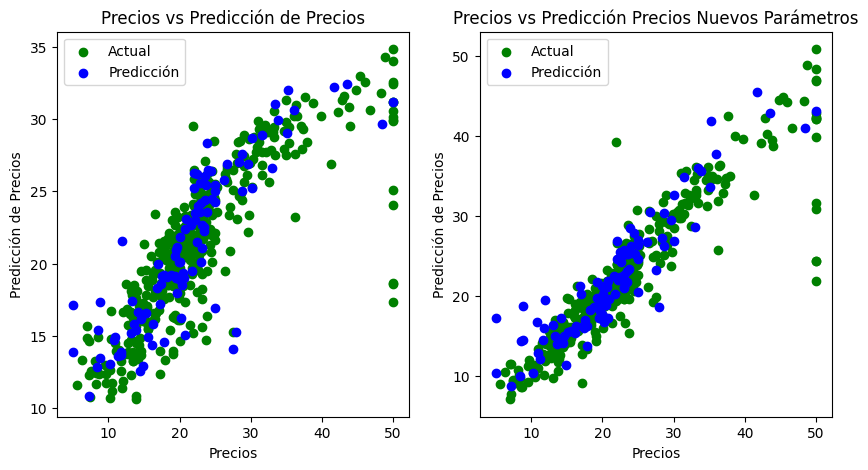

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
# Izquierda
ax1.scatter(y_train, modelo_SVM.predict(X_train), c = 'green', label='Actual')
ax1.scatter(y_test,prediccion_SVM_y, c='blue', label='Predicción')

ax1.set_xlabel("Precios")
ax1.set_ylabel("Predicción de Precios")
ax1.set_title("Precios vs Predicción de Precios")
ax1.legend()

# Derecha
ax2.scatter(y_train, modelo_SVM_2.predict(X_train), c = 'green', label='Actual')
ax2.scatter(y_test,prediccion_SVM_y_2, c='blue', label='Predicción')

ax2.set_xlabel("Precios")
ax2.set_ylabel("Predicción de Precios")
ax2.set_title("Precios vs Predicción Precios Nuevos Parámetros")
ax2.legend()

plt.show()

In [39]:
valores_SVM = pd.DataFrame(data = [['Coeficiente de determinación R2: ', r2_SVM, r2_SVM_2], ['Error cuadrático medio: ', mse_SVM, mse_SVM_2]])

In [40]:
valores_SVM.columns = ['Modelo', 'SVM', 'SVM_Mejorado']
valores_SVM

# ¿NO ha cambiado nada? ¿?

,Modelo,SVM,SVM_Mejorado
0,Coeficiente de determinación R2:,0.668806,0.841541
1,Error cuadrático medio:,22.962382,10.986339


En este caso si podemos apreciar mejorías entre el modelo y el modelo-mejorado.

**Miramos los parametros del modelo K - Neighbors:**

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
modelo_KNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [43]:
parametros_KNN = {
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20,30, 40],
    'metric': ['minkowski', 'euclidean', 'manhattan'],
    'metric_params': [None],
    'n_jobs': [None],
    'n_neighbors': [2, 5, 6, 8],
    'p': [1, 2, 3],
    'weights': ['uniform', 'distance']
}

In [44]:
grid = GridSearchCV(KNeighborsRegressor(), parametros_KNN, cv=5)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)

{'algorithm': 'auto', 'leaf_size': 20, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 8, 'p': 2, 'weights': 'distance'}
0.4734450570882996


Se repite el modelo con los nuevos parámetros:

In [45]:
modelo_KNN_2 = KNeighborsRegressor(**grid.best_params_)

modelo_KNN_2.fit(X_train, y_train)
prediccion_KNN_y_2= modelo_KNN_2.predict(X_test)

print('Precisión del train: ', modelo_KNN_2.score(X_train, y_train))
print("Precisión del test: ", modelo_KNN_2.score(X_test, y_test))
# print("Precisión del modelo: ", r2_score(y, modelo_SVM_2.predict(X)))

Precisión del train:  0.999999999999996
Precisión del test:  0.8600521036237423


In [46]:
r2_KNN_2 = r2_score(y_test, prediccion_KNN_y_2)
mse_KNN_2 = mean_squared_error(y_test, prediccion_KNN_y_2)
print('Coeficiente de determinación R2: ', r2_KNN_2)
print('Error cuadrático medio: ', mse_KNN_2)

Coeficiente de determinación R2:  0.8600521036237423
Error cuadrático medio:  9.702893943117013


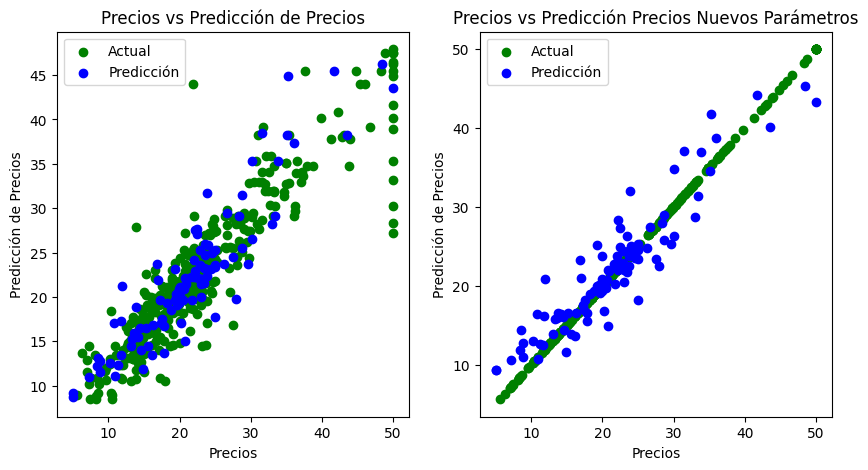

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
# Izquierda
ax1.scatter(y_train, modelo_KNN.predict(X_train), c = 'green', label='Actual')
ax1.scatter(y_test,prediccion_KNN_y, c='blue', label='Predicción')

ax1.set_xlabel("Precios")
ax1.set_ylabel("Predicción de Precios")
ax1.set_title("Precios vs Predicción de Precios")
ax1.legend()

# Derecha
ax2.scatter(y_train, modelo_KNN_2.predict(X_train), c = 'green', label='Actual')
ax2.scatter(y_test,prediccion_KNN_y_2, c='blue', label='Predicción')

ax2.set_xlabel("Precios")
ax2.set_ylabel("Predicción de Precios")
ax2.set_title("Precios vs Predicción Precios Nuevos Parámetros")
ax2.legend()

plt.show()

In [48]:
valores_SVM = pd.DataFrame(data = [['Coeficiente de determinación R2: ', r2_SVM, r2_SVM_2], ['Error cuadrático medio: ', mse_SVM, mse_SVM_2]])

In [49]:
valores_SVM.columns = ['Modelo', 'SVM', 'SVM_Mejorado']
valores_SVM

# ¿NO ha cambiado nada? ¿?

,Modelo,SVM,SVM_Mejorado
0,Coeficiente de determinación R2:,0.668806,0.841541
1,Error cuadrático medio:,22.962382,10.986339


In [50]:
from sklearn.model_selection import cross_val_score

In [51]:
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=42)

In [52]:
cross_val_score(KNeighborsRegressor(**grid.best_params_),X,y)

array([0.70054803, 0.80452975, 0.65972096, 0.86354376, 0.74184282])

**Exercici 4**

Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).

In [53]:
# Rendimiento / Puntuación en Regresión Lineal:

rend_RL_CV = cross_val_score(LinearRegression(), X, y, cv=5,scoring ='r2')
max(rend_RL_CV)

0.7809341232911565

In [54]:
# Rendimiento / Puntuación en Support Vector Machines (SVM):

rend_SVM_CV = cross_val_score(SVR(), X, y, cv=5,scoring ='r2')
max(rend_SVM_CV)

0.6178027304942759

In [55]:
# Rendimiento / Puntuación en K - Neighbors:

rend_KNN_CV = cross_val_score(KNeighborsRegressor(), X, y, cv=5,scoring ='r2')
max(rend_KNN_CV)

0.8525002371731913

In [56]:
comp_R2_CV = pd.DataFrame([['Regresión Lineal', r2_RL, max(rend_RL_CV)], ['Support Vector Machines', r2_SVM, max(rend_SVM_CV)], ['K - Neighbors', r2_KNN, max(rend_KNN_CV)]])

In [57]:
comp_R2_CV.columns = ['Modelo', 'Train/Test (R2)', 'Cross Validation']
comp_R2_CV

,Modelo,Train/Test (R2),Cross Validation
0,Regresión Lineal,0.738410,0.780934
1,Support Vector Machines,0.668806,0.617803
2,K - Neighbors,0.829378,0.852500


Parece mejorar en todos los casos cuando se emplean todos los datos.

**Exercici 5**  
  
No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.

In [58]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [59]:
# Sobre los mismos conjuntos, separamos la variable (RM)

nueva_X = viviendas_transf.drop(['RM','MEDV'],axis=1)
y = viviendas_transf['MEDV']

In [60]:
# 80% para train / 20% para test:

nueva_X_train, nueva_X_test, y_train, y_test = train_test_split(nueva_X, y, test_size=0.2, random_state=77)

In [61]:
# Comprobamos que ambos test / train tienen el mismo tamaño:

print(len(nueva_X_train) == len(y_train))
print(len(nueva_X_test) == len(y_test))

True
True


In [62]:
# Aplicamos el modelo K - Neighbors (que dió el mejor reultado de los tres) al nuevo grupo sin la variable (RM):

from sklearn.neighbors import KNeighborsRegressor
modelo_KNN_N = KNeighborsRegressor()

modelo_KNN_N.fit(nueva_X_train, y_train)
prediccion_KNN_y_nueva = modelo_KNN_N.predict(nueva_X_test)

print('Precisión del train: ', modelo_KNN_N.score(nueva_X_train, y_train))
print("Precisión del test: ", modelo_KNN_N.score(nueva_X_test, y_test))
# print("Precisión del modelo: ", r2_score(y, modelo_KNN.predict(X)))

Precisión del train:  0.7794886666653261
Precisión del test:  0.6852205945807845


In [63]:
modelo_KNN_N.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [64]:
parametros_KNN_N = {
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20,30,40],
    'metric': ['minkowski', 'euclidean', 'manhattan'],
    'metric_params': [None],
    'n_jobs': [None],
    'n_neighbors': [5, 6, 8],
    'p': [1, 2, 3],
    'weights': ['uniform', 'distance']
}

In [65]:
grid_2 = GridSearchCV(KNeighborsRegressor(), parametros_KNN_N, cv=10)
grid_2.fit(nueva_X, y)
print(grid_2.best_params_)
print(grid_2.best_score_)

{'algorithm': 'auto', 'leaf_size': 20, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 6, 'p': 2, 'weights': 'distance'}
-0.06396782479223011


In [66]:
modelo_KNN_N_2 = KNeighborsRegressor(**grid_2.best_params_)

modelo_KNN_N_2.fit(nueva_X_train, y_train)
prediccion_KNN_y_2_N= modelo_KNN_N_2.predict(nueva_X_test)

print('Precisión del train: ', modelo_KNN_N_2.score(nueva_X_train, y_train))
print("Precisión del test: ", modelo_KNN_N_2.score(nueva_X_test, y_test))
# print("Precisión del modelo: ", r2_score(y, modelo_SVM_2.predict(X)))

Precisión del train:  0.9999999999999282
Precisión del test:  0.7538442147755722


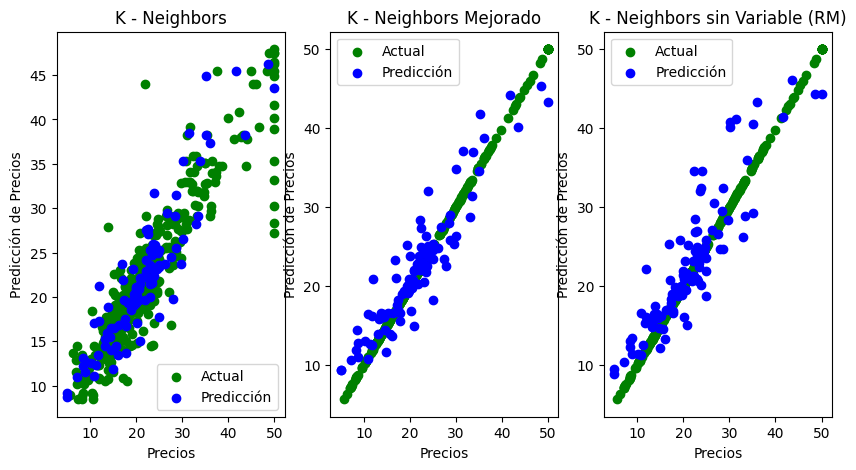

In [67]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))
# Izquierda
ax1.scatter(y_train, modelo_KNN.predict(X_train), c = 'green', label='Actual')
ax1.scatter(y_test,prediccion_KNN_y, c='blue', label='Predicción')

ax1.set_xlabel("Precios")
ax1.set_ylabel("Predicción de Precios")
ax1.set_title("K - Neighbors")
ax1.legend()

# Centro
ax2.scatter(y_train, modelo_KNN_2.predict(X_train), c = 'green', label='Actual')
ax2.scatter(y_test,prediccion_KNN_y_2, c='blue', label='Predicción')

ax2.set_xlabel("Precios")
ax2.set_ylabel("Predicción de Precios")
ax2.set_title("K - Neighbors Mejorado")
ax2.legend()

# Derecha
ax3.scatter(y_train, modelo_KNN_N_2.predict(nueva_X_train), c = 'green', label='Actual')
ax3.scatter(y_test,prediccion_KNN_y_2_N, c='blue', label='Predicción')

ax3.set_xlabel("Precios")
ax3.set_ylabel("Predicción de Precios")
ax3.set_title("K - Neighbors sin Variable (RM)")
ax3.legend()

plt.show()

La precisión del modelo quitando la variable RM, es más baja que en con la variable. Esto se produce porque la variable RM (Número de habitaciones de la vivienda) influye notablemente en el precio de la vivienda.  
Al quitarla del modelo, se produce un desajuste significante en el modelo.  